In [1]:
#DRAGON REAL ESTATE
#PRICE PREDICTION OF HOUSES
#better price prediction 
#our target is to create model which will predict the price for any new house by looking at the same features
#dragon real estate use this model for house price prediction and will invest in the area where  if its undervalued

In [2]:
#supervised problem
#regression algorithm
#RSME ROOT SQUARED MEAN ERROR performance measure

In [3]:
#DRAGON REAL ESTATE HOUSE PRICE PREDICTION

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
#getting data 
housing=pd.read_csv("data.csv")

In [6]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
housing.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [10]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286902,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704597,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


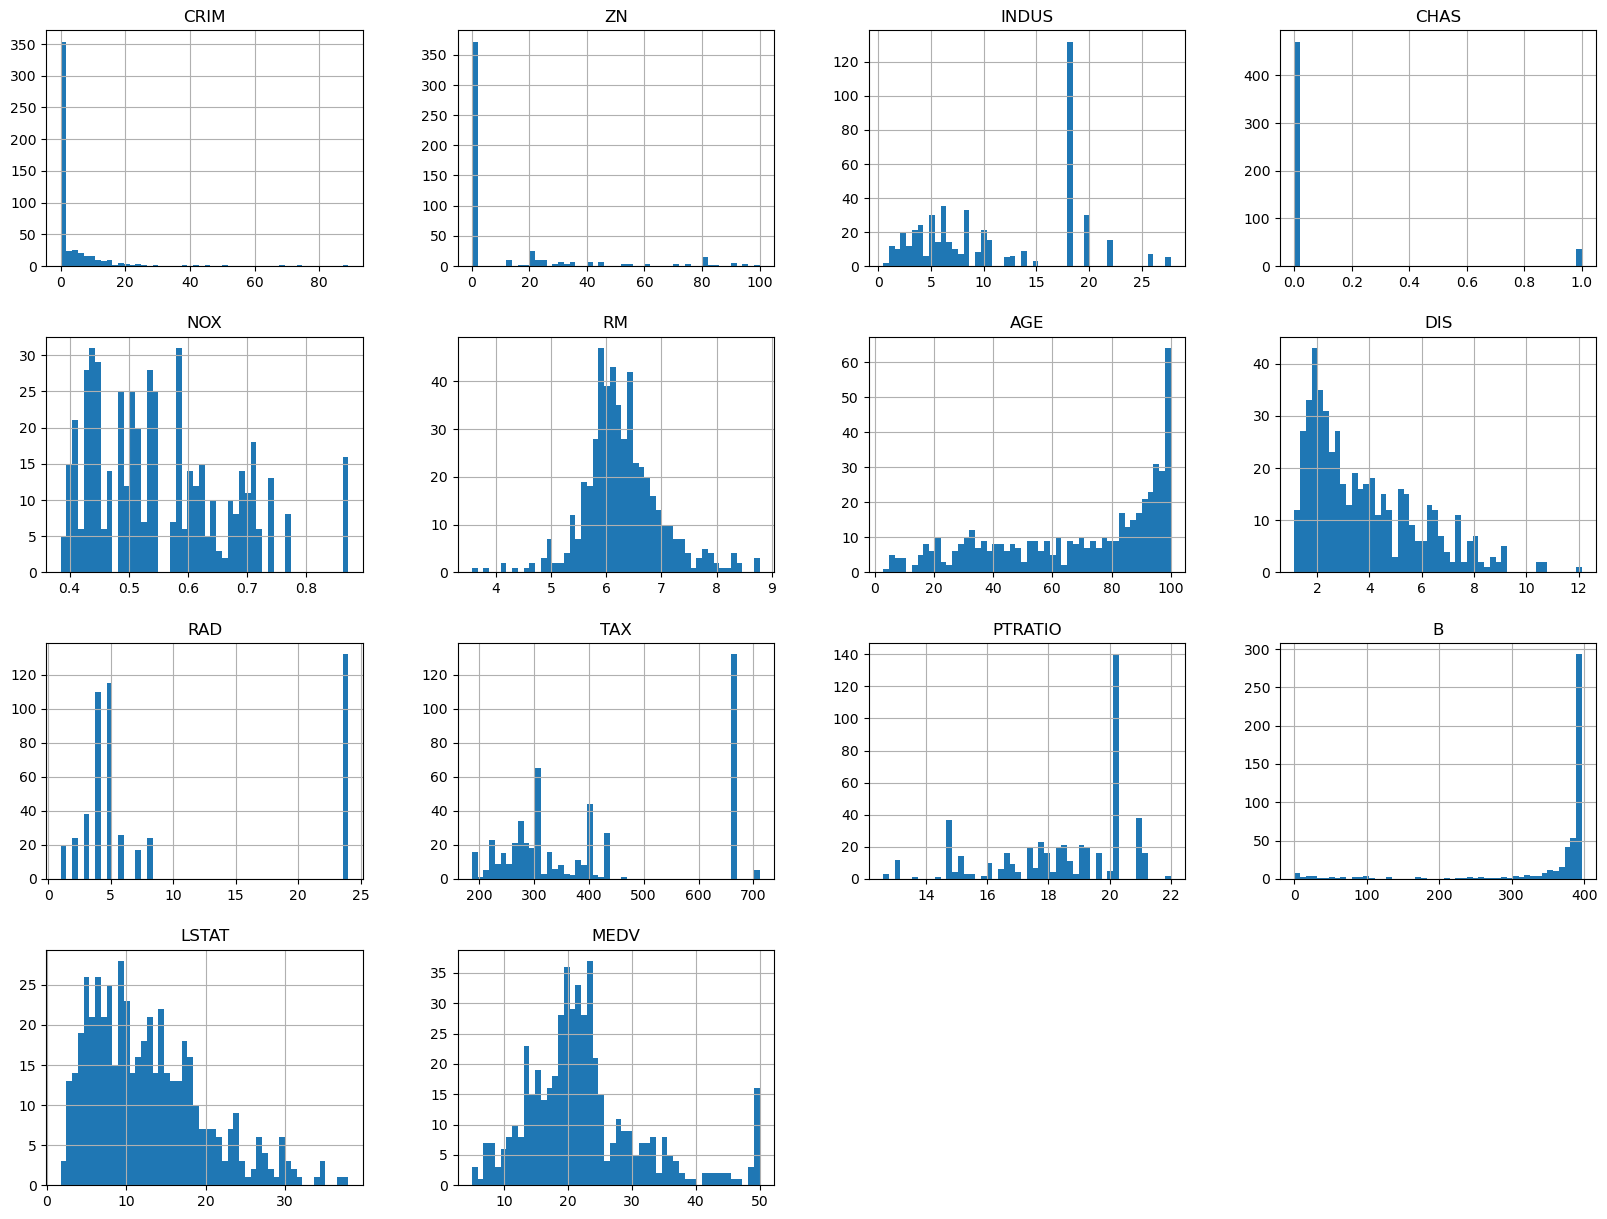

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

# Train Test Splitting

In [12]:
np.random.seed(42)
def train_test_split(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [13]:
#train_set,test_set=train_test_split(housing,0.2)

In [14]:
#print(f"Rows in train set : {len(train_set)} \nRows in test set :{len(test_set)}\n")

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)} \nRows in test set :{len(test_set)}\n")

Rows in train set : 404 
Rows in test set :102



In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.310297,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662565,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.936000,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.540000,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
95/7

13.571428571428571

In [20]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [21]:
376/28

13.428571428571429

In [22]:
housing=strat_train_set.copy()

# Looking For Correlations

In [23]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679999
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

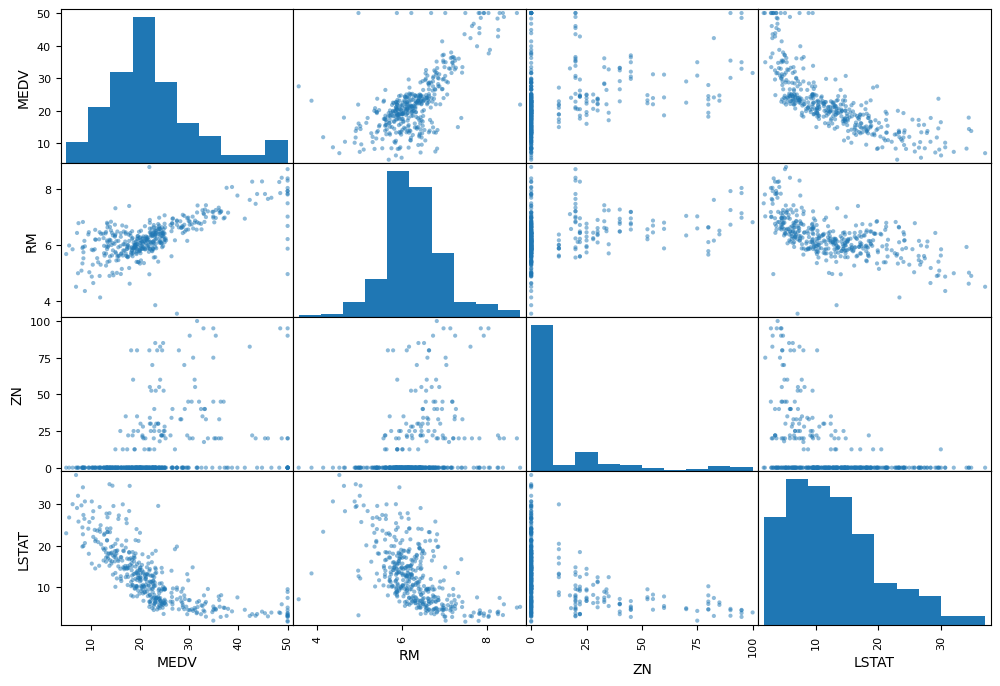

In [24]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

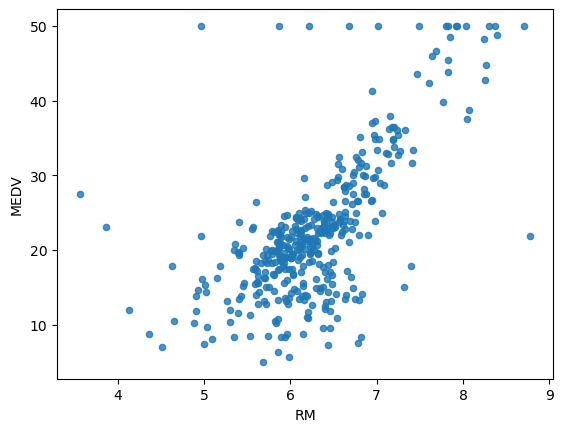

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

# Trying out  various attributes

In [26]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [27]:
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [28]:
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679999
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526250
LSTAT     -0.740494
Name: MEDV, dtype: float64

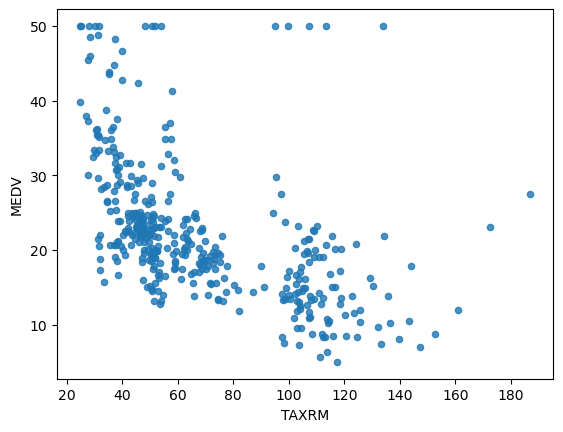

In [30]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)
plt.show()

In [31]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_lables=strat_train_set["MEDV"].copy()

# missing values

In [32]:
#to take care missing attributes 
#1.get rid of missing datapoint
#2.get rid of whole missing attribute
#3.set the value to some value (0 ,mean,median)

In [33]:
#removing missing values by option number 1
a=housing.dropna(subset=['RM'])
a.shape
#note that original housing dataframe remain unchanged

(401, 13)

In [34]:
housing.shape

(404, 13)

In [35]:
#removing missing values by option 2
housing.drop('RM',axis=1).shape
#note that original housing dataframe remain unchanged

(404, 12)

In [36]:
median=housing['RM'].median()

In [37]:
median

6.211

In [38]:
housing['RM'].fillna(median)
#note that original housing dataframe remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [39]:
housing.shape

(404, 13)

In [40]:
housing.describe()#before we started filling missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281010,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715466,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [41]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_.shape

(13,)

In [43]:
X=imputer.transform(housing)

In [44]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [45]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280490,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712824,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

In [46]:
#primary three types of objects in scikit_learn design
#1)estimators:It estimate some parameter based on dataset.eg.imputer.It has fit method and transform method.
#Fit method-Fits the dataset and calculate internal parameters 

#2)transformers: transform method  takes input and returns output based on learnings from fit().It also have convienience
#function called fit_transform()  which fits and then trannsform

#3)predictors:LinearRegression is an example of predictor.fit() and predict() are two common functions.It also gives score()
#which will evaluate the predictions.

# Feature Scaling 

In [47]:
#Primarily, two types of feature scaling
#1)Min-Max Scaling(Normalization)
#(value-min)/(max-min)
#Sklearn provides a class called MinMaxScaler for this
#2)Standardization
#(value-mean)/sd
#sklearn provides a class StandardScaler for this

# Creating Pipelines

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler()),])

In [49]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [50]:
housing_num_tr.shape

(404, 13)

# Selecting Desired Model For Dragon Real Estate

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model= DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_lables)

RandomForestRegressor()

In [86]:
some_data=housing.iloc[:5]
some_lables=housing_lables.iloc[:5]
prepared_data=my_pipeline.transform(some_data)

In [87]:
model.predict(prepared_data)

array([22.473, 25.354, 16.508, 23.541, 23.525])

In [88]:
list(some_lables)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluvating the Model

In [89]:
from sklearn.metrics import  mean_squared_error

housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_lables,housing_predictions)
rmse=np.sqrt(mse)

In [90]:
rmse

1.314762002707096

# Using Better Evaluvation Technique: Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_lables,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [92]:
rmse_scores

array([2.68577268, 3.06608422, 4.38243328, 2.7083554 , 3.35693212,
       2.64076819, 4.77862089, 3.3047291 , 3.07891556, 3.34499217])

In [93]:
def print_scores(scores):
    print("Scores:",scores)
    print("mean:",scores.mean())
    print("std",scores.std())

In [94]:
print_scores(rmse_scores)

Scores: [2.68577268 3.06608422 4.38243328 2.7083554  3.35693212 2.64076819
 4.77862089 3.3047291  3.07891556 3.34499217]
mean: 3.3347603598198474
std 0.6794620432253419


# Saving the model

In [95]:
from joblib import dump,load
dump(model,'dragon.joblib')

['dragon.joblib']

# Testing Model On Test Data

In [96]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [97]:
final_rmse

2.9548271489872557

In [99]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24228143, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])